# Name: Bervelyn Sawyerr-Markwei
# Roll Number: 10201100095.
# Course Name: Neural Networks.
# Task: Assignment Two (2).

# Implementing a Three Hidden Layer Neural Network on IRIS Dataset.

## 1. Import Libraries.

In [1]:
import pandas as pd  
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.preprocessing import normalize

## 2. Load the Iris dataset.

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

## 3. Split the dataset into training and testing sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Preprocess the data.

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## 5. Create a model with three hidden layers.

In [5]:
# Create a Sequential model
model = Sequential()
# Input layer
model.add(Dense(units=8, input_dim=4, activation='relu'))
# Three hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# Output layer
model.add(Dense(units=3, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## 6. Train the model.

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/100
24/24 [==============================] - 2s 36ms/step - loss: 0.9926 - accuracy: 0.3417 - val_loss: 0.8972 - val_accuracy: 0.5000
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8845 - accuracy: 0.5500 - val_loss: 0.7992 - val_accuracy: 0.7000
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7985 - accuracy: 0.7083 - val_loss: 0.7183 - val_accuracy: 0.7333
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.7583 - val_loss: 0.6164 - val_accuracy: 0.7333
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.7833 - val_loss: 0.5003 - val_accuracy: 0.8000
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.4823 - accuracy: 0.8250 - val_loss: 0.4019 - val_accuracy: 0.8333
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.3995 - accuracy: 0.8583 - val_loss: 0.3380 - val_accuracy: 0.8333
Epoch 8/100

Epoch 59/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9833 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 60/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 61/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0615 - accuracy: 0.9750 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 62/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0707 - accuracy: 0.9667 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 63/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 64/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 65/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 

## 7. Plot the loss and accuracy during training.

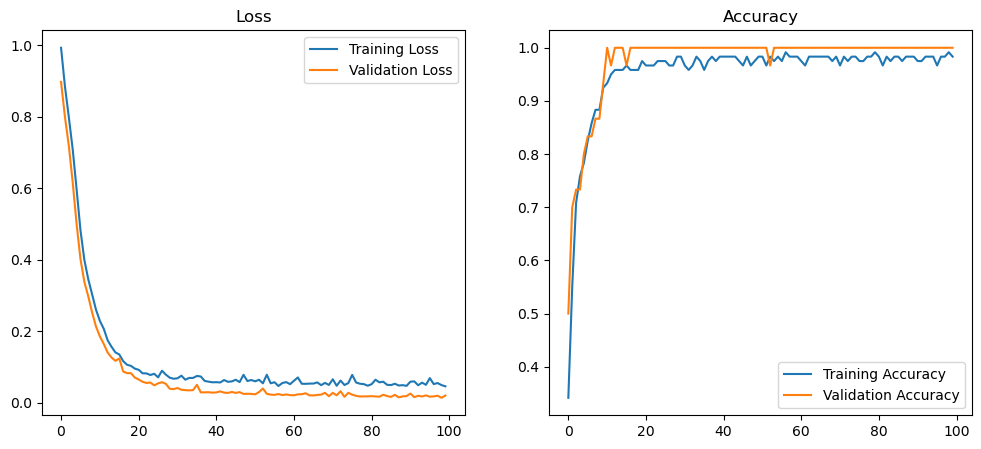

In [7]:
plt.figure(figsize=(12, 5))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

## 8. Evaluate the model on the test data.

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 341ms/step - loss: 0.0202 - accuracy: 1.0000
Test Loss: 0.0202
Test Accuracy: 1.0000


## 9. Plot the confusion matrix.

1/1 [==============================] - 0s 180ms/step


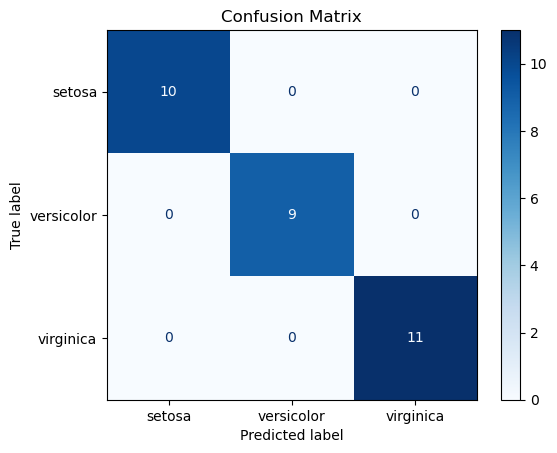

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
target_names = iris.target_names

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()